## e-비즈니스학과 201921487 김서준 

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
#pip install nltk

In [3]:
#spam.csv 파일 자체를 인코딩이 utf-8로 다시 저장한 후 불러와야함

In [4]:
spamdf = pd.read_csv('data/spam.csv', encoding = 'utf-8')
spamdf = spamdf.drop('Unnamed: 2', axis=1)
spamdf = spamdf.drop('Unnamed: 3', axis=1)
spamdf = spamdf.drop('Unnamed: 4', axis=1)
spamdf['spam'] = spamdf['v1'].apply(lambda x: 1 if x=='spam' else 0)
spamdf

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [5]:
X = spamdf.v1
y = spamdf.spam
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

# nltk 데이터 다운로드(stopword 등이 있음)
nltk.download('stopwords')
nltk.download('wordnet')

# 사용자 정의 전처리 함수
def custom_preprocessor(text):
    # 숫자와 구두점 제거
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # 소문자로 변환
    text = text.lower()
    return text

# 사용자 정의 토크나이저 함수 (표제어 원형 복원)
def custom_tokenizer(text):
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grupi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\grupi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
NBmodel = Pipeline([
    ('vectorizer', CountVectorizer(preprocessor=custom_preprocessor, stop_words=stopwords.words('english'))),
    ('nb', MultinomialNB())
])
NBmodel.fit(train_X, train_y)

C:\Users\grupi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 CountVectorizer(preprocessor=<function custom_preprocessor at 0x000001435C7EB670>,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('nb', MultinomialNB())])

In [8]:
NBmodel.score(train_X, train_y)

1.0

In [9]:
NBmodel.score(test_X, test_y)

1.0

In [10]:
NBmodel.predict(test_X)
pred_y = NBmodel.predict(test_X)

Accuracy: 1.00

Confusion Matrix:
[[965   0]
 [  0 150]]
roc_auc : 1.0


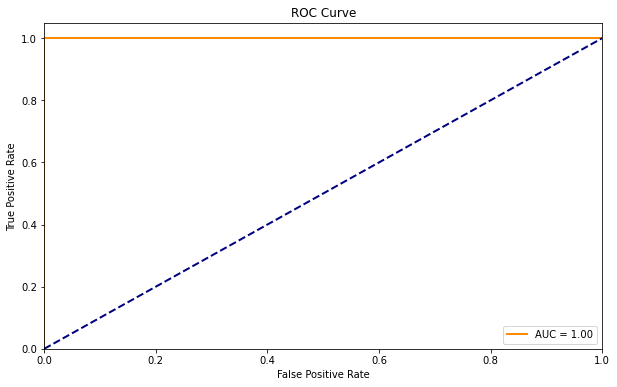

In [11]:
predictions = NBmodel.predict(test_X)

accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy:.2f}")


# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(test_y, predictions))
conf_matrix = confusion_matrix(test_y, predictions)
# 모델 예측 확률 얻기
probabilities = NBmodel.predict_proba(test_X)[:, 1]

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(test_y, probabilities)

# AUC 계산
roc_auc = auc(fpr, tpr)
print('roc_auc :',roc_auc)
# ROC Curve 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

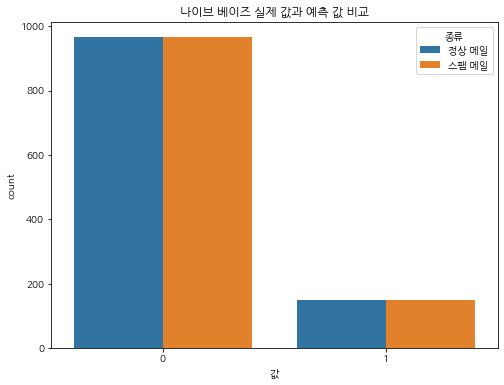

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic' 
spamdf = pd.DataFrame({'정상 메일': test_y, '스팸 메일': pred_y})

# 막대 그래프로 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='값', hue='종류', data=spamdf.melt(value_vars=['정상 메일', '스팸 메일'], var_name='종류', value_name='값'))
plt.title('나이브 베이즈 실제 값과 예측 값 비교')
plt.show()


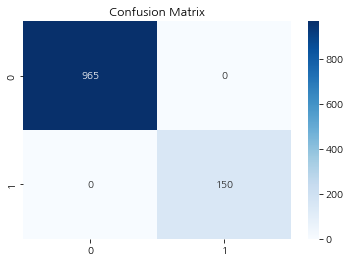

In [14]:
import seaborn as sns

# 혼동 행렬 히트맵 그리기
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
